# ***Bipartite graphs***

In [13]:
import networkx as nx
from networkx import bipartite
import matplotlib.pyplot as plt
import pandas as pd

***A graph becomes a bipartite graph when its nodes can be split into two groups where very edge connects one node in one group to one in the other group.***

In [2]:
# eg. consider a network of ecommerce customer and ecommerce product
# a person can be a customer of more than one product

In [15]:
# define the column name
column_names = ['user', 'product', 'rating', 'timestamp']

# define path
file_path  =   r'C:\Users\your-path'

# read data
sample=pd.read_csv(
    file_path, 
    names=column_names, 
    header=None,
    delimiter=",", 
    nrows=50
)

# manipulate data
sample['user'] = 'user' + sample['user'].astype(str)
sample['product'] = 'product' + sample['product'].astype(str)

# filtered by it rating considered 4 or 5 
sample_rate_4_and_5 = sample[sample['rating'].isin([5])]

print (len(sample_rate_4_and_5))
sample_rate_4_and_5


27


,user,product,rating,timestamp
0,user1,product1,5.0,1117404000
2,user1,product3,5.0,1105916400
5,user1,product6,5.0,1103497200
7,user1,product8,5.0,1074985200
8,user1,product9,5.0,1071961200
11,user1,product12,5.0,1070492400
12,user1,product13,5.0,1070319600
13,user1,product14,5.0,1066514400
15,user1,product16,5.0,1066341600
16,user1,product17,5.0,1066168800


In [16]:
# networkx does not have a built in class for bipartite graphs
# but there's a workaround

bpgraph = nx.Graph()

products = sample_rate_4_and_5['product']
users = sample_rate_4_and_5['user']

bpgraph.add_nodes_from(users, partition = 'users')
bpgraph.add_nodes_from(products, partition = 'products')

print('users length', len(users))
print('product length', len(products))

users length 27
product length 27


In [17]:
user_and_product_list_tuple = list(zip(sample_rate_4_and_5['user'], sample_rate_4_and_5['product']))

In [72]:
# add tuple to edges
bpgraph.add_edges_from(user_and_product_list_tuple)
bipartite.is_bipartite(bpgraph)

True

In [64]:
# define positiion

positions = nx.circular_layout(bpgraph) 

list_of_position = {}
counter_user = 1
counter_product = 1

for i in positions:
    if 'user' in i:
        list_of_position.update({i:([0, counter_user])})
        counter_user -= 3
    elif 'product' in i:
        list_of_position.update({i:([1,counter_product])})
        counter_product -= 2

In [73]:
# define color

cdict = { 'users': '#8884d8', 'products': '#82ca9d' } 

bpgraph.nodes()

partition_dict = nx.get_node_attributes(bpgraph, "partition")

list_of_color = [cdict.get(partition_dict.get(node)) for node in bpgraph.nodes()]

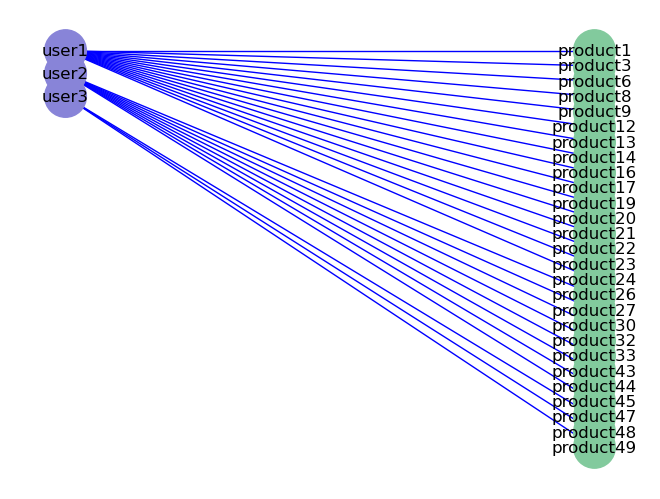

In [77]:
nx.draw(
    bpgraph, 
    node_color = list_of_color, 
    edge_color = "blue",
    font_color = "black", 
    node_size = 900, 
    with_labels = True, 
    pos = list_of_position
)